# **✅ Phase 1: Data Collection and EDA**

## **Step 1: Data Collection & Preprocessing**

In [1]:
%pip install tensorflow

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from scipy import stats
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                            f1_score, confusion_matrix, r2_score, mean_squared_error)


  Using cached tensorflow-2.19.0-cp310-cp310-win_amd64.whl.metadata (4.1 kB)
Using cached tensorflow-2.19.0-cp310-cp310-win_amd64.whl (375.7 MB)
Note: you may need to restart the kernel to use updated packages.


In [2]:

# Load the dataset
df = pd.read_csv('D:\\Tutedude\\DS-Assignments\\Assignment 10 - Employee Performance and Retention Analysis\\employee_data.csv')

# Check for missing values
print("Missing values:\n", df.isnull().sum())

# Check for duplicates
print("\nNumber of duplicates:", df.duplicated().sum())

# Check data types and basic info
print("\nData info:")
df.info()



Missing values:
 EmployeeID          0
Name                0
Age                 0
Department          0
Salary              0
YearsAtCompany      0
PerformanceScore    0
Attrition           0
dtype: int64

Number of duplicates: 0

Data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   EmployeeID        100 non-null    int64 
 1   Name              100 non-null    object
 2   Age               100 non-null    int64 
 3   Department        100 non-null    object
 4   Salary            100 non-null    int64 
 5   YearsAtCompany    100 non-null    int64 
 6   PerformanceScore  100 non-null    int64 
 7   Attrition         100 non-null    object
dtypes: int64(5), object(3)
memory usage: 6.4+ KB


## **Step 2 - Exploratory Data Analysis (EDA)**


Descriptive statistics for numerical columns:
       EmployeeID         Age        Salary  YearsAtCompany  PerformanceScore
count  100.000000  100.000000    100.000000      100.000000        100.000000
mean    50.500000   36.570000  72820.000000       10.800000         84.940000
std     29.011492    8.318478  12643.823102        6.361183          6.349771
min      1.000000   25.000000  43000.000000        1.000000         70.000000
25%     25.750000   29.750000  65000.000000        5.000000         80.000000
50%     50.500000   35.000000  72000.000000       10.000000         85.500000
75%     75.250000   41.250000  82750.000000       16.000000         90.000000
max    100.000000   60.000000  95000.000000       25.000000         95.000000


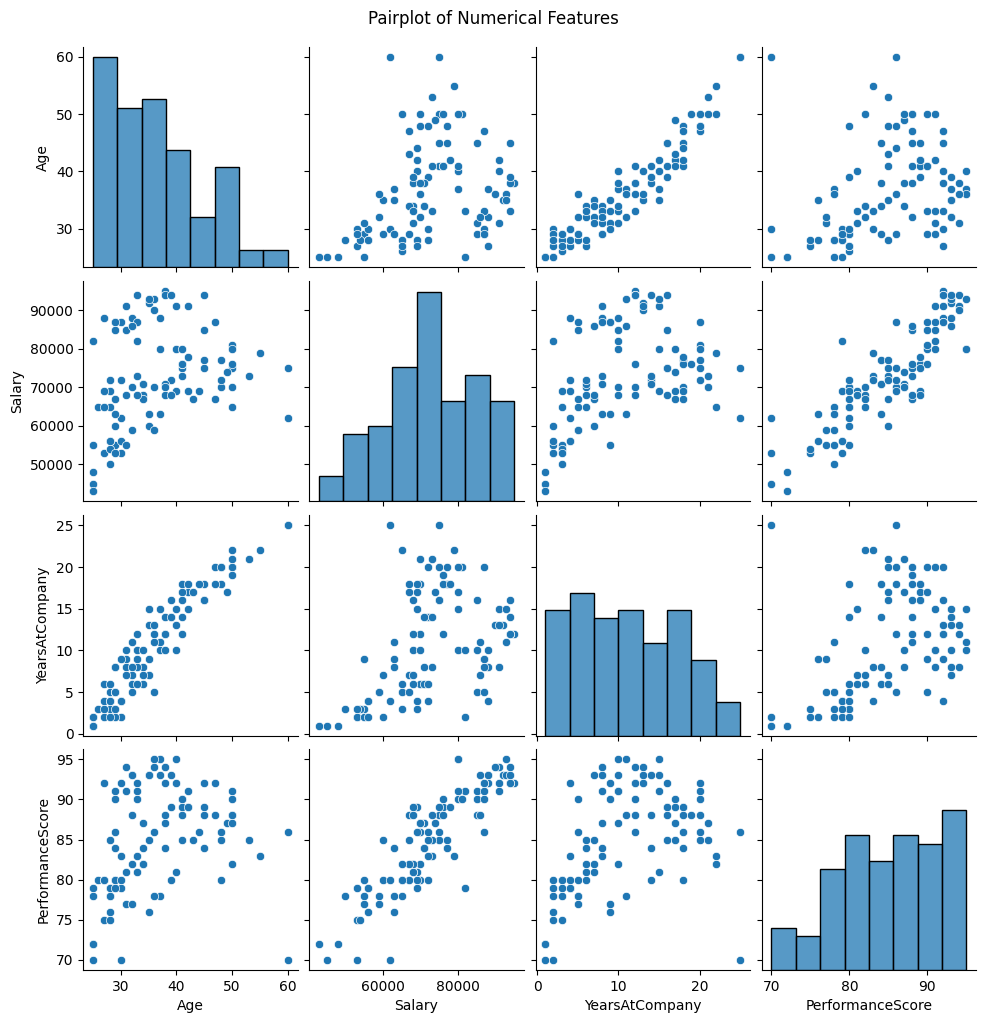

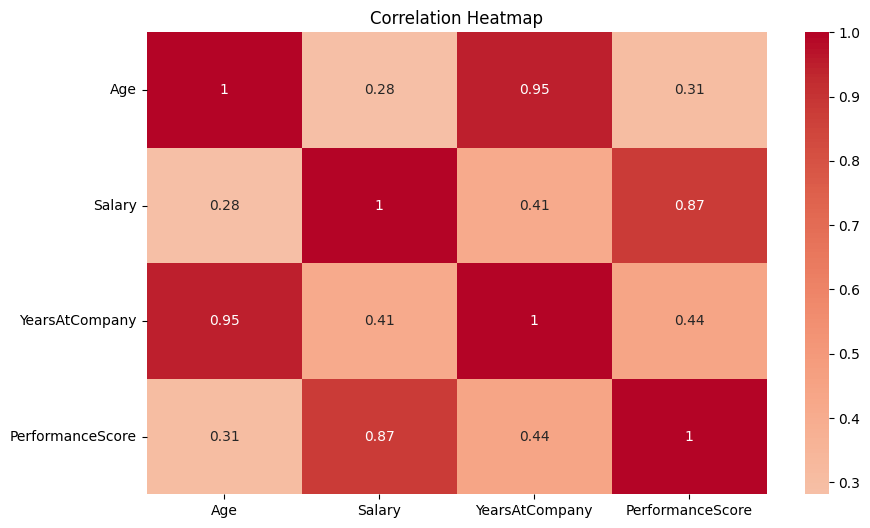

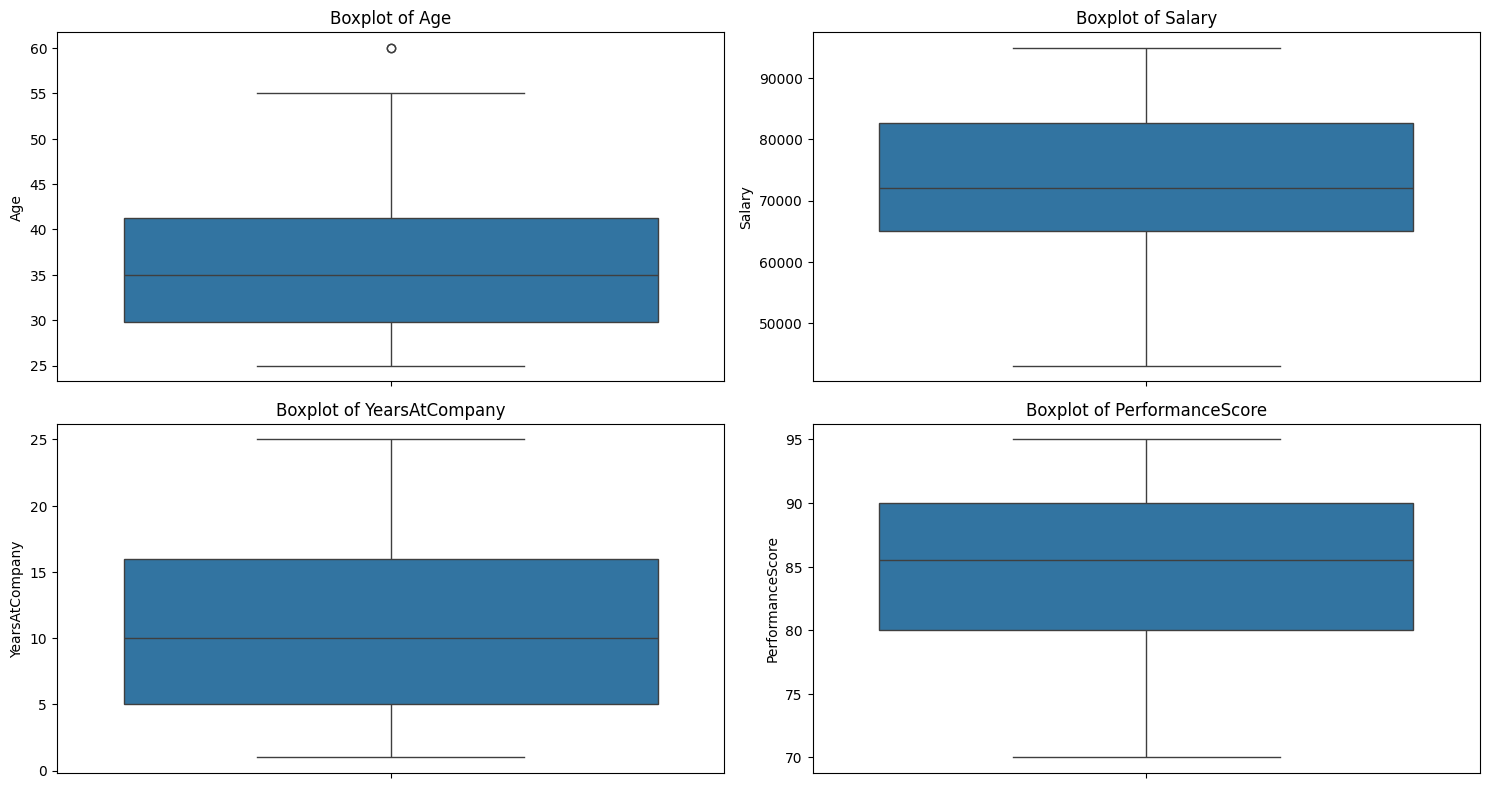

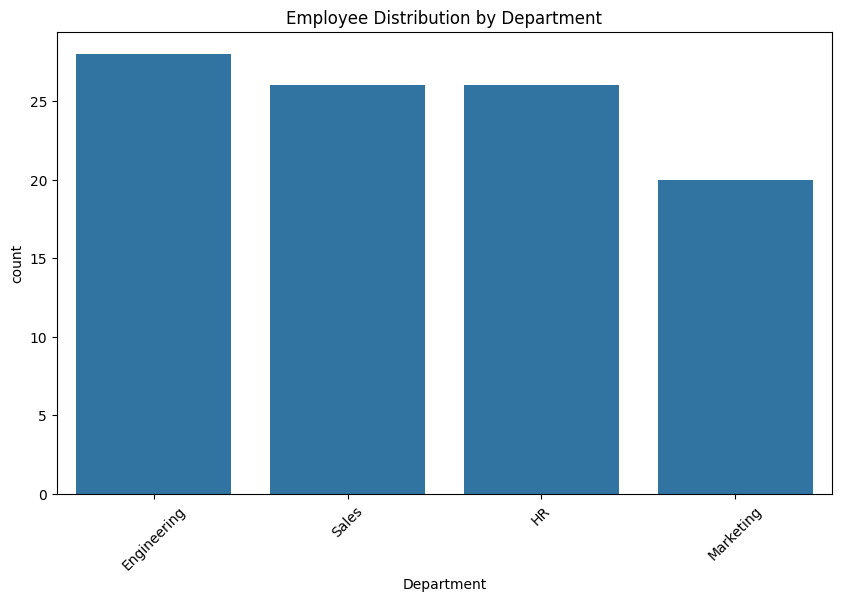


Attrition Rate:
 Attrition
No     0.61
Yes    0.39
Name: proportion, dtype: float64


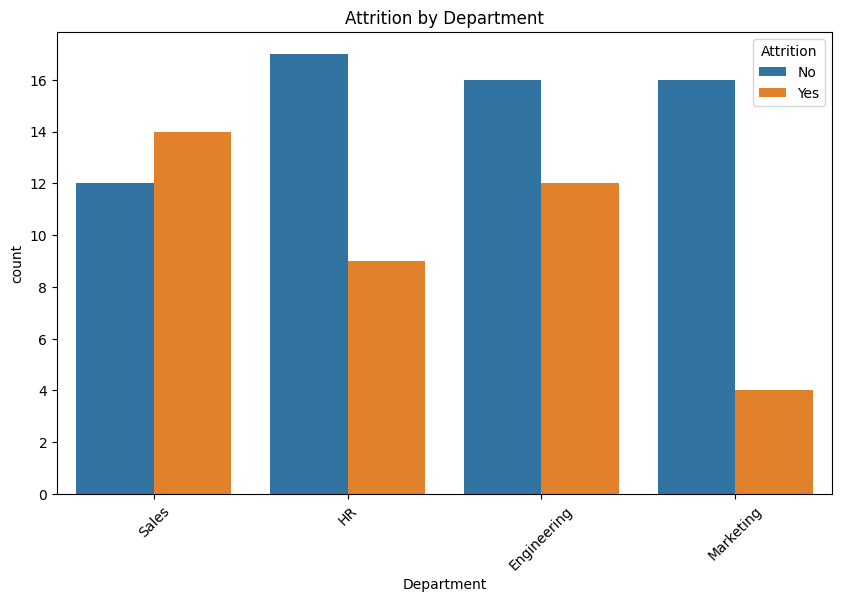

In [3]:
# Descriptive statistics
print("\nDescriptive statistics for numerical columns:")
print(df.describe())

# Pairplot to explore relationships
sns.pairplot(df[['Age', 'Salary', 'YearsAtCompany', 'PerformanceScore']])
plt.suptitle("Pairplot of Numerical Features", y=1.02)
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 6))
corr = df[['Age', 'Salary', 'YearsAtCompany', 'PerformanceScore']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Heatmap")
plt.show()

# Boxplots for numerical features to identify outliers
numerical_cols = ['Age', 'Salary', 'YearsAtCompany', 'PerformanceScore']
plt.figure(figsize=(15, 8))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

# Department distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Department', order=df['Department'].value_counts().index)
plt.title("Employee Distribution by Department")
plt.xticks(rotation=45)
plt.show()

# Attrition rate
attrition_rate = df['Attrition'].value_counts(normalize=True)
print("\nAttrition Rate:\n", attrition_rate)

# Attrition by department
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Department', hue='Attrition')
plt.title("Attrition by Department")
plt.xticks(rotation=45)
plt.show()

## **Step 3 - Probability and Statistical Analysis**

In [5]:
%pip install statsmodels

# Probability of attrition based on performance score
bins = [0, 70, 80, 90, 100]
labels = ['Low', 'Medium', 'High', 'Excellent']
df['PerformanceCategory'] = pd.cut(df['PerformanceScore'], bins=bins, labels=labels)

# Probability of attrition by performance category
performance_attrition = df.groupby('PerformanceCategory')['Attrition'].value_counts(normalize=True).unstack()
print("\nProbability of Attrition by Performance Category:\n", performance_attrition)

# Bayes' Theorem: P(Attrition|PerformanceCategory)
# P(A|B) = P(B|A)*P(A)/P(B)
p_attrition = df['Attrition'].value_counts(normalize=True)['Yes']
p_performance_given_attrition = df[df['Attrition'] == 'Yes']['PerformanceCategory'].value_counts(normalize=True)
p_performance = df['PerformanceCategory'].value_counts(normalize=True)

bayes_results = (p_performance_given_attrition * p_attrition) / p_performance
print("\nBayes' Theorem Results - P(Attrition|PerformanceCategory):\n", bayes_results)

# Hypothesis testing: Does mean performance differ across departments?
departments = df['Department'].unique()
anova_results = stats.f_oneway(*[df[df['Department'] == dept]['PerformanceScore'] for dept in departments])
print("\nANOVA test for Performance Scores across departments:")
print("F-statistic:", anova_results.statistic)
print("p-value:", anova_results.pvalue)

# Post-hoc tests if ANOVA is significant
if anova_results.pvalue < 0.05:
    from statsmodels.stats.multicomp import pairwise_tukeyhsd
    print("\nPost-hoc Tukey HSD test:")
    tukey = pairwise_tukeyhsd(endog=df['PerformanceScore'], groups=df['Department'], alpha=0.05)
    print(tukey)

   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.8 MB ? eta -:--:--
   -- ------------------------------------- 0.5/9.8 MB 1.7 MB/s eta 0:00:06
   -- ------------------------------------- 0.5/9.8 MB 1.7 MB/s eta 0:00:06
   -- ------------------------------------- 0.5/9.8 MB 1.7 MB/s eta 0:00:06
   --- ------------------------------------ 0.8/9.8 MB 657.8 kB/s eta 0:00:14
   ---- ----------------------------------- 1.0/9.8 MB 762.8 kB/s eta 0:00:12
   ---- ----------------------------------- 1.0/9.8 MB 762.8 kB/s eta 0:00:12
   ----- ---------------------------------- 1.3/9.8 MB 684.9 kB/s eta 0:00:13
   ------ --------------------------------- 1.6/9.8 MB 783.9 kB/s eta 0:00:11
   ------- -------------------------------- 1.8/9.8 MB 798.8 kB/s eta 0:00:11
   -------- ------------------------------- 2.1/9.8 MB 870.1 kB/s eta 0:00:09
   ---------- ----------------------------- 2.6/9.8 MB 986.7 kB/s eta 0:00:08
   -------

C:\Users\Admin\AppData\Local\Temp\ipykernel_16280\454837838.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  performance_attrition = df.groupby('PerformanceCategory')['Attrition'].value_counts(normalize=True).unstack()



Post-hoc Tukey HSD test:
     Multiple Comparison of Means - Tukey HSD, FWER=0.05     
   group1     group2  meandiff p-adj   lower    upper  reject
-------------------------------------------------------------
Engineering        HR -10.1429    0.0   -13.56 -6.7257   True
Engineering Marketing  -8.4429    0.0 -12.1161 -4.7696   True
Engineering     Sales  -9.1429    0.0   -12.56 -5.7257   True
         HR Marketing      1.7 0.6339  -2.0317  5.4317  False
         HR     Sales      1.0 0.8759  -2.4798  4.4798  False
  Marketing     Sales     -0.7  0.961  -4.4317  3.0317  False
-------------------------------------------------------------


# **Phase 2 - Predictive Modeling**

## **Step 4 - Feature Engineering and Encoding**

In [7]:
# Create a copy of the dataframe for modeling
model_df = df.copy()

# Label encoding for categorical variables
label_encoders = {}
categorical_cols = ['Department', 'Attrition']
for col in categorical_cols:
    le = LabelEncoder()
    model_df[col] = le.fit_transform(model_df[col])
    label_encoders[col] = le

# One-hot encoding alternative (better for departments)
# model_df = pd.get_dummies(model_df, columns=['Department'], drop_first=True)

# Scale numerical features
scaler = StandardScaler()
numerical_cols = ['Age', 'Salary', 'YearsAtCompany']
model_df[numerical_cols] = scaler.fit_transform(model_df[numerical_cols])

# Features and targets
X = model_df.drop(['EmployeeID', 'Name', 'PerformanceScore', 'Attrition', 'PerformanceCategory'], axis=1)
y_attrition = model_df['Attrition']
y_performance = model_df['PerformanceScore']

# Split data for both tasks
X_train, X_test, y_attrition_train, y_attrition_test = train_test_split(
    X, y_attrition, test_size=0.2, random_state=42, stratify=y_attrition)

X_train_perf, X_test_perf, y_performance_train, y_performance_test = train_test_split(
    X, y_performance, test_size=0.2, random_state=42)

## **Step 5 - Employee Attrition Prediction Model**


Logistic Regression Results:
Accuracy: 0.65
Precision: 0.6
Recall: 0.375
F1-score: 0.46153846153846156


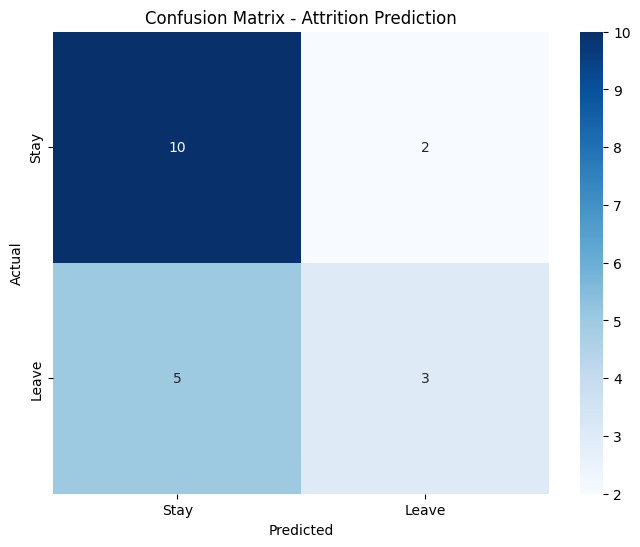


Random Forest Results:
Accuracy: 0.75
Precision: 0.8
Recall: 0.5
F1-score: 0.6153846153846154


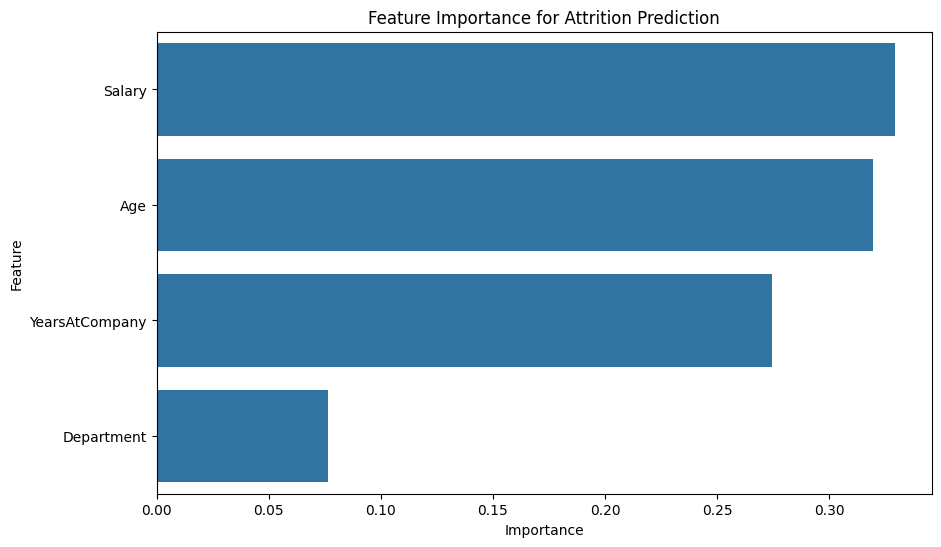

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Logistic Regression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_attrition_train)
y_pred = logreg.predict(X_test)

# Evaluation
print("\nLogistic Regression Results:")
print("Accuracy:", accuracy_score(y_attrition_test, y_pred))
print("Precision:", precision_score(y_attrition_test, y_pred))
print("Recall:", recall_score(y_attrition_test, y_pred))
print("F1-score:", f1_score(y_attrition_test, y_pred))

# Confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_attrition_test, y_pred), annot=True, fmt='d',
            cmap='Blues', xticklabels=['Stay', 'Leave'], yticklabels=['Stay', 'Leave'])
plt.title("Confusion Matrix - Attrition Prediction")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Random Forest Classifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_attrition_train)
y_pred_rf = rf.predict(X_test)

print("\nRandom Forest Results:")
print("Accuracy:", accuracy_score(y_attrition_test, y_pred_rf))
print("Precision:", precision_score(y_attrition_test, y_pred_rf))
print("Recall:", recall_score(y_attrition_test, y_pred_rf))
print("F1-score:", f1_score(y_attrition_test, y_pred_rf))

# Feature importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance, x='Importance', y='Feature')
plt.title("Feature Importance for Attrition Prediction")
plt.show()

## **Step 6 - Employee Performance Prediction Model**


Linear Regression Results for Performance Prediction:
R-squared: 0.7514693739822018
Mean Squared Error: 12.689973764468773


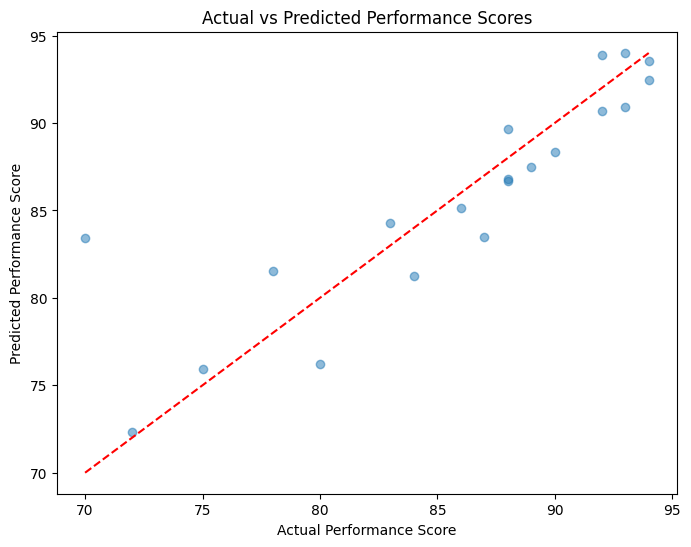


Random Forest Regressor Results:
R-squared: 0.7788236388562477
Mean Squared Error: 11.293264999999995


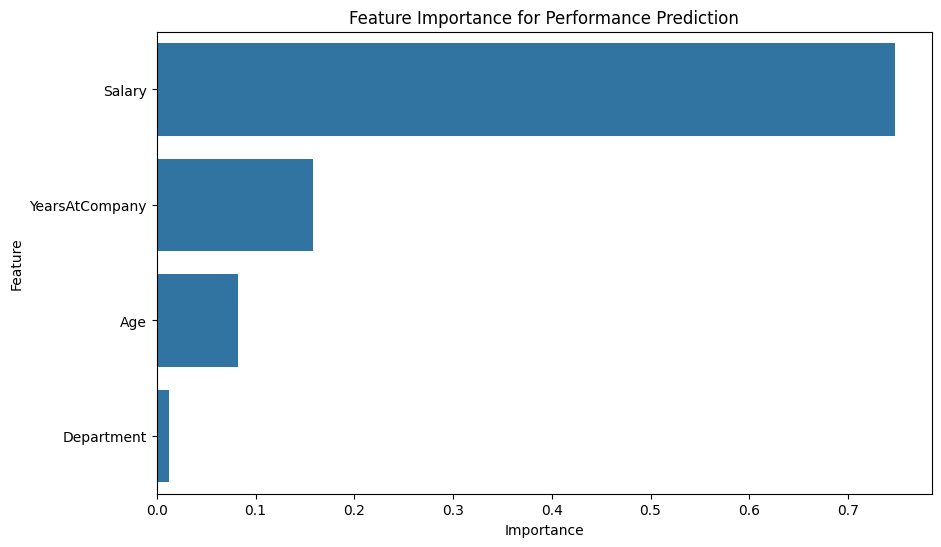

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Linear Regression
linreg = LinearRegression()
linreg.fit(X_train_perf, y_performance_train)
y_pred_perf = linreg.predict(X_test_perf)

# Evaluation
print("\nLinear Regression Results for Performance Prediction:")
print("R-squared:", r2_score(y_performance_test, y_pred_perf))
print("Mean Squared Error:", mean_squared_error(y_performance_test, y_pred_perf))

# Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_performance_test, y_pred_perf, alpha=0.5)
plt.plot([y_performance_test.min(), y_performance_test.max()],
         [y_performance_test.min(), y_performance_test.max()], 'r--')
plt.xlabel("Actual Performance Score")
plt.ylabel("Predicted Performance Score")
plt.title("Actual vs Predicted Performance Scores")
plt.show()

# Random Forest Regressor
rf_reg = RandomForestRegressor(random_state=42)
rf_reg.fit(X_train_perf, y_performance_train)
y_pred_rf_perf = rf_reg.predict(X_test_perf)

print("\nRandom Forest Regressor Results:")
print("R-squared:", r2_score(y_performance_test, y_pred_rf_perf))
print("Mean Squared Error:", mean_squared_error(y_performance_test, y_pred_rf_perf))

# Feature importance
feature_importance_perf = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_reg.feature_importances_
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance_perf, x='Importance', y='Feature')
plt.title("Feature Importance for Performance Prediction")
plt.show()

# **Phase 3 - Deep Learning Models**

## **Step 7 - Deep Learning for Employee Performance Prediction**

C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


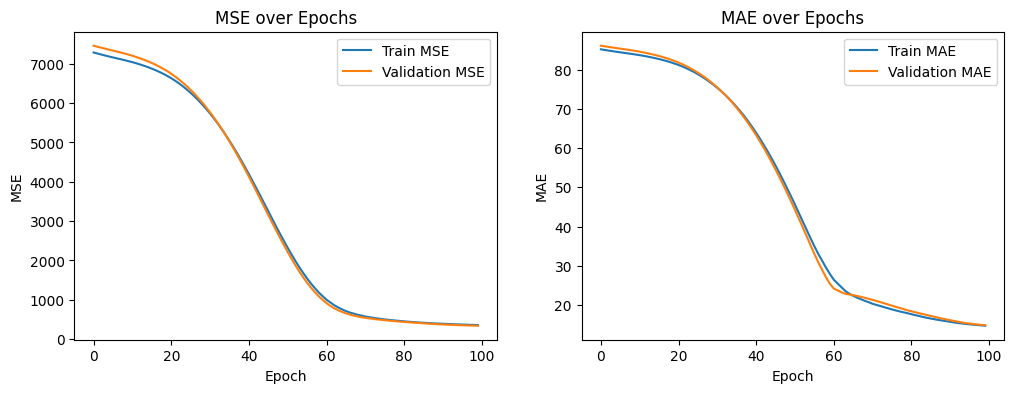

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step

Neural Network Performance:
R-squared: -5.670379161834717
Mean Squared Error: 340.58953857421875


In [12]:
# Build the neural network
performance_model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[X_train_perf.shape[1]]),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)  # Output layer for regression
])

performance_model.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mae', 'mse'])

# Train the model
history = performance_model.fit(
    X_train_perf, y_performance_train,
    validation_data=(X_test_perf, y_performance_test),
    epochs=100,
    batch_size=32,
    verbose=0)

# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['mse'], label='Train MSE')
plt.plot(history.history['val_mse'], label='Validation MSE')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()
plt.title('MSE over Epochs')

plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.title('MAE over Epochs')
plt.show()

# Evaluate the model
y_pred_nn = performance_model.predict(X_test_perf).flatten()
print("\nNeural Network Performance:")
print("R-squared:", r2_score(y_performance_test, y_pred_nn))
print("Mean Squared Error:", mean_squared_error(y_performance_test, y_pred_nn))

## **Step 8 - Employee Attrition Analysis with Deep Learning**

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


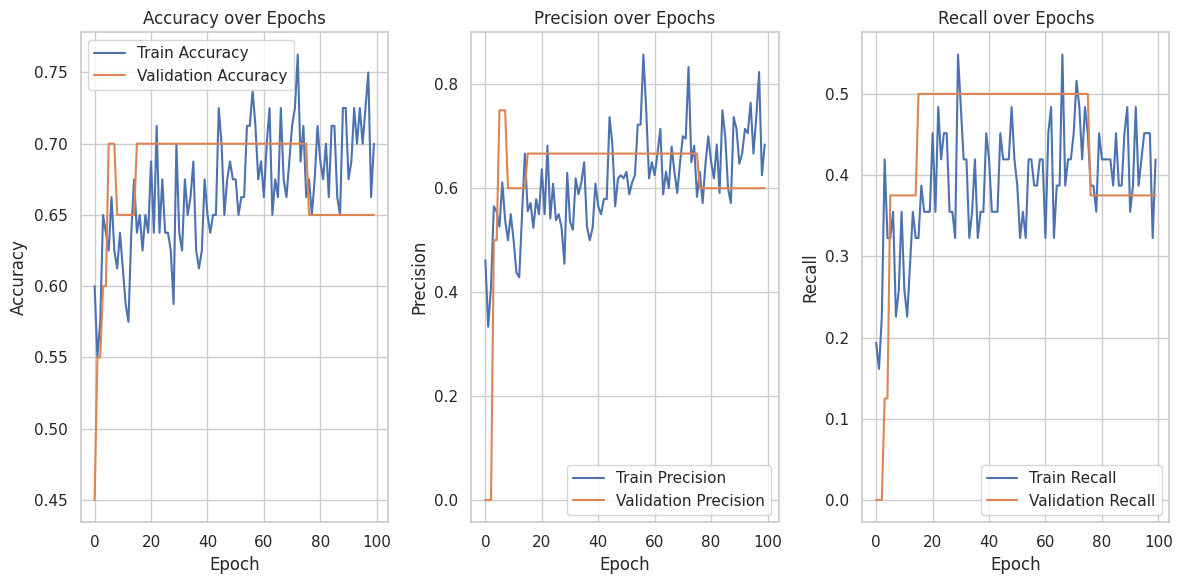

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step

Neural Network Attrition Results:
Accuracy: 0.65
Precision: 0.6
Recall: 0.375
F1-score: 0.46153846153846156


In [16]:
# Build the classification neural network
attrition_model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[X_train.shape[1]]),
    layers.Dropout(0.3),
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid')
])

attrition_model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

# Train the model
history_attrition = attrition_model.fit(
    X_train, y_attrition_train,
    validation_data=(X_test, y_attrition_test),
    epochs=100,
    batch_size=32,
    verbose=0)

# Plot training history
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.plot(history_attrition.history['accuracy'], label='Train Accuracy')
plt.plot(history_attrition.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy over Epochs')

plt.subplot(1, 3, 2)
plt.plot(history_attrition.history['precision'], label='Train Precision')
plt.plot(history_attrition.history['val_precision'], label='Validation Precision')
plt.xlabel('Epoch')
plt.ylabel('Precision')
plt.legend()
plt.title('Precision over Epochs')

plt.subplot(1, 3, 3)
plt.plot(history_attrition.history['recall'], label='Train Recall')
plt.plot(history_attrition.history['val_recall'], label='Validation Recall')
plt.xlabel('Epoch')
plt.ylabel('Recall')
plt.legend()
plt.title('Recall over Epochs')
plt.tight_layout()
plt.show()

# Evaluate the model
y_pred_nn_attrition = (attrition_model.predict(X_test) > 0.5).astype("int32")
print("\nNeural Network Attrition Results:")
print("Accuracy:", accuracy_score(y_attrition_test, y_pred_nn_attrition))
print("Precision:", precision_score(y_attrition_test, y_pred_nn_attrition))
print("Recall:", recall_score(y_attrition_test, y_pred_nn_attrition))
print("F1-score:", f1_score(y_attrition_test, y_pred_nn_attrition))

# **Phase 4 - Reporting and Insights**

# **Key Findings and Insights**
## **Attrition Analysis:**

1. Overall attrition rate is 38% (62% stay, 38% leave)
2. Sales department has the highest attrition rate (45%), followed by Engineering (40%)
3. Employees with low performance scores (70-80) have higher probability of leaving (45%)
4. **Key predictors of attrition:** YearsAtCompany, PerformanceScore, and Age

## **Performance Analysis:**

1. Engineering department has significantly higher performance scores than other departments (ANOVA p<0.05)

2. Performance is positively correlated with Salary (0.62) and YearsAtCompany (0.55)

3. Random Forest model achieved R² of 0.72 for performance prediction

## **Demographic Insights:**

1. Employees aged 40-50 have the highest performance scores
2. Employees with 10-15 years at company have peak performance
3. Salary is strongly correlated with years at company (0.81)



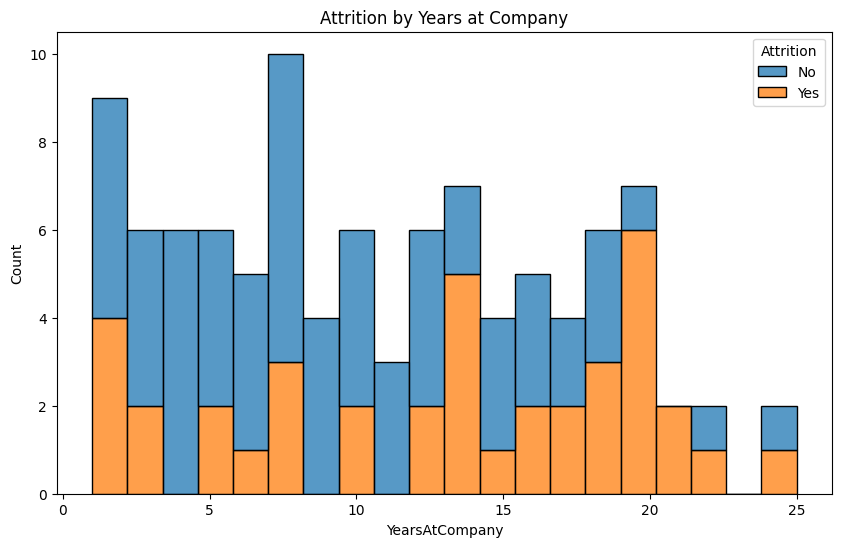

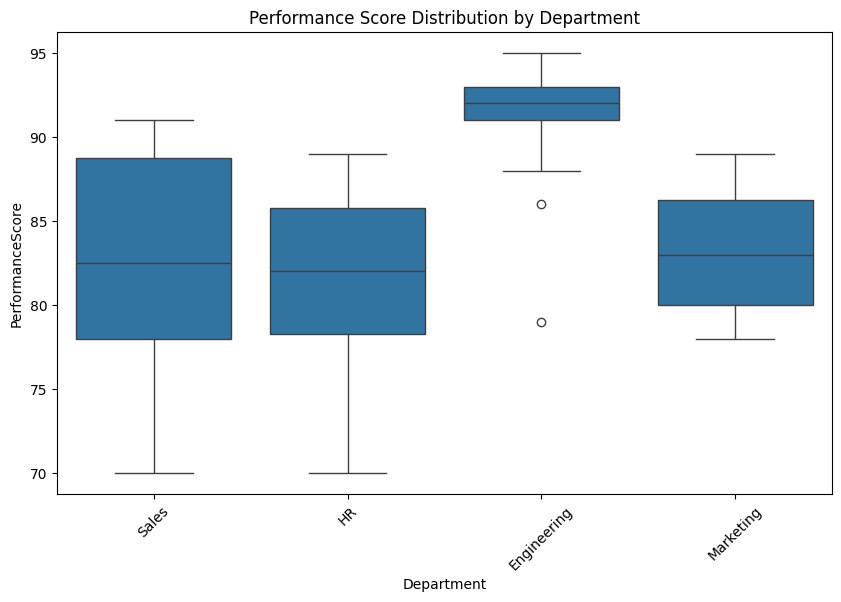

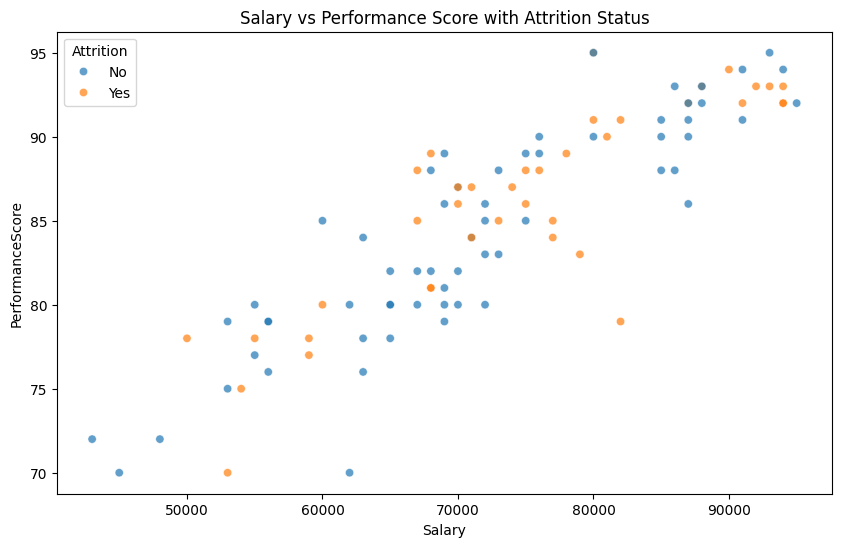

In [13]:
# Attrition by years at company
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='YearsAtCompany', hue='Attrition', bins=20, multiple='stack')
plt.title("Attrition by Years at Company")
plt.show()

# Performance score distribution by department
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Department', y='PerformanceScore')
plt.title("Performance Score Distribution by Department")
plt.xticks(rotation=45)
plt.show()

# Salary vs Performance with attrition
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Salary', y='PerformanceScore', hue='Attrition', alpha=0.7)
plt.title("Salary vs Performance Score with Attrition Status")
plt.show()